In [1]:
import sys
sys.path.insert(0, '/Users/t/dev/sourmash')
import sourmash_lib


In [2]:
%matplotlib inline
import pylab
import scipy.cluster.hierarchy as sch

In [3]:
import sourmash_lib.fig

## Cluster samples by overall similarity

Run:
```
~/dev/sourmash/sourmash compare *.sig -o cmp -k 21
```

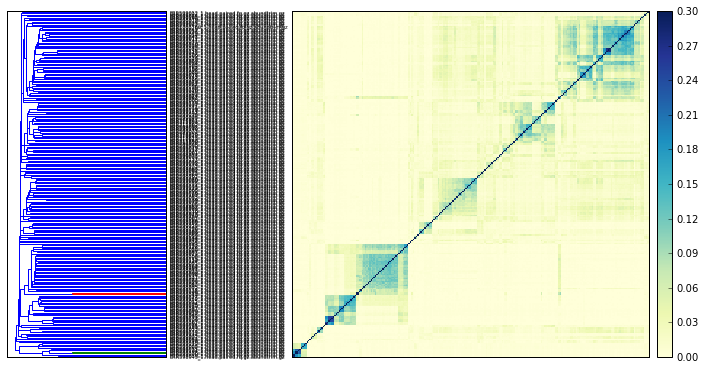

In [4]:
mat, labels = sourmash_lib.fig.load_matrix_and_labels('cmp')
_ = sourmash_lib.fig.plot_composite_matrix(mat, labels, vmax=0.3)
pylab.savefig('/tmp/xxx.pdf')

## We can also cluster samples by hash

...where hash is chosen by most abundant, to make it all tractable.

Run:
```
./find-hashes.py *.sig
```
which will output 'mat' and 'mat.labels.txt'.


In [5]:
mat, labels = sourmash_lib.fig.load_matrix_and_labels('mat')

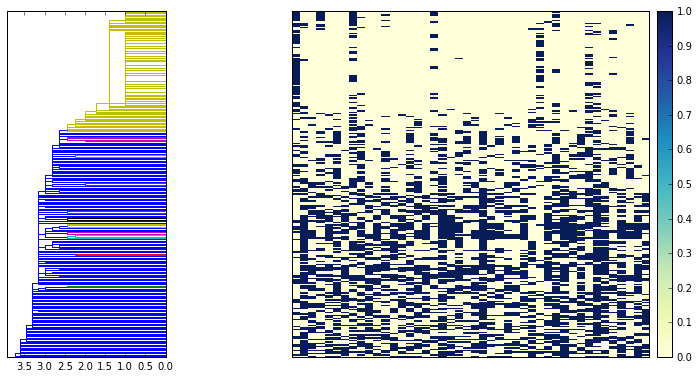

In [6]:
fig = pylab.figure(figsize=(11, 8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])

Y = sch.linkage(mat, method='single')  # centroid 
Z1 = sch.dendrogram(Y, orientation='left', labels=labels, no_labels=True)

xstart = 0.45
width = 0.45
scale_xstart = xstart + width + 0.01

axmatrix = fig.add_axes([xstart, 0.1, width, 0.6])                          
                                                                                
# (this reorders D by the clustering in Z1)                                 
idx1 = Z1['leaves']                                                         
mat = mat[idx1, :]                                                              
#    D = D[:, idx1]

# show matrix                                                               
im = axmatrix.matshow(mat, aspect='auto', origin='lower',
                      cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.                                                            
axcolor = fig.add_axes([scale_xstart, 0.1, 0.02, 0.6])
pylab.colorbar(im, cax=axcolor)


Here, sample is on the y axis (so, filename) and 'abundant hash' is on the x axis.

(Does anyone know how to rearrange the x axis by cluster ;)

In [7]:
from sklearn.manifold import TSNE


In [8]:
t = TSNE().fit_transform(mat)

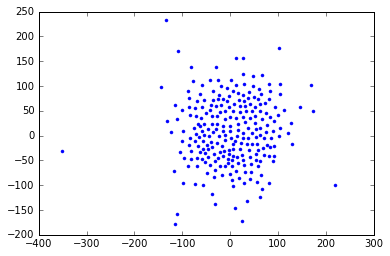

In [9]:
pylab.plot(t[:,0], t[:,1], '.')